In [1]:
from PIL import Image
import os, glob, numpy as np #이미지 프로세싱
from sklearn.model_selection import train_test_split #train set과 test set으로 분류 

# 데이터셋 저장한 디렉토리
base_dir = './KWGuideImg/dataset/train'
categories=os.listdir(base_dir) #["기념","화도","옥의","비마","새빛","참빛","한울","연구"]
nb_classes=len(categories) #class 개수 설정

In [2]:
from keras.preprocessing.image import ImageDataGenerator

#ImageDataGenerator 클래스 사용
# 학습 도중에 이미지 변형 가능

datagen = ImageDataGenerator(
    rotation_range=40, #이미지 회전 범위
    width_shift_range=0.2, #그림 수평 or 수직으로 랜덤하게 평행이동시키는 범위
    height_shift_range=0.2,
    rescale=1./255, #1/255로 스케일링하여 0~1버위로 변환하여 효과적으로 학습
    shear_range=0.2, #임의 전단 변환
    zoom_range=0.2, #임의 확대/축소 범위
    horizontal_flip=False, #이미지를 50%확률로 수평으로 뒤집음(뒤집으면 자연스럽지 않으므로, False) 
    fill_mode='nearest') #이미지를 회전, 이동하거나 축소할 때 생기는 공간 채움

Using TensorFlow backend.


In [3]:
# 훈련용 80주념기념관 사진 디렉터리
train_ginyeom_dir = './KWGuideImg/dataset/train/gi'

# 훈련용 화도관 사진 디렉터리
train_hwado_dir = './KWGuideImg/dataset/train/hwan'

# 훈련용 새빛관 사진 디렉터리
train_saebit_dir = './KWGuideImg/dataset/train/se'

# 훈련용 비마관 사진 디렉터리
train_bima_dir = './KWGuideImg/dataset/train/bi'

# 훈련용 옥의관 사진 디렉터리
train_oakui_dir = './KWGuideImg/dataset/train/oak'

# 훈련용 한천재 사진 디렉터리
train_hancheon_dir = './KWGuideImg/dataset/train/hanchoen'

# 훈련용 복지관 사진 디렉터리
train_bokji_dir = './KWGuideImg/dataset/train/bok'

# 훈련용 연구관 사진 디렉터리
train_yeonku_dir = './KWGuideImg/dataset/train/yeon'

# 훈련용 참빛관 사진 디렉터리
train_chambit_dir = './KWGuideImg/dataset/train/cham'

# 훈련용 한울관 사진 디렉터리
train_hanoul_dir = './KWGuideImg/dataset/train/hanoul'

In [18]:
# 이미지 전처리 유틸리티 모듈
from keras.preprocessing import image

fnames1 = sorted([os.path.join(train_ginyeom_dir, fname) for fname in os.listdir(train_ginyeom_dir)])
fnames2 = sorted([os.path.join(train_hwado_dir, fname) for fname in os.listdir(train_hwado_dir)])
fnames3 = sorted([os.path.join(train_saebit_dir, fname) for fname in os.listdir(train_saebit_dir)])
fnames4 = sorted([os.path.join(train_bima_dir, fname) for fname in os.listdir(train_bima_dir)])
fnames5 = sorted([os.path.join(train_oakui_dir, fname) for fname in os.listdir(train_oakui_dir)])
fnames6 = sorted([os.path.join(train_chambit_dir, fname) for fname in os.listdir(train_chambit_dir)])
fnames7 = sorted([os.path.join(train_hanoul_dir, fname) for fname in os.listdir(train_hanoul_dir)])

for img_path in fnames1:

    img = image.load_img(img_path, target_size=(150, 150)) # 이미지 읽고 크기 변경

    x = image.img_to_array(img) # (150, 150, 3) 크기의 넘파이 배열

    x = x.reshape((1,) + x.shape) # (1, 150, 150, 3) 크기의 넘파이 배열

    # flow() 메서드로 랜덤하게 변환된 이미지를 배치 단위로 생성하여 폴더에 저장
    i = 0
    for batch in datagen.flow(x, batch_size=1,
                             save_to_dir='./KWGuideImg/dataset/train/gi',save_format='jpg'):
        i += 1
        if i > 10:
            break #이미지 10장 생성

for img_path in fnames2:

    img = image.load_img(img_path, target_size=(150, 150)) # 이미지 읽고 크기 변경

    x = image.img_to_array(img) # (150, 150, 3) 크기의 넘파이 배열

    x = x.reshape((1,) + x.shape) # (1, 150, 150, 3) 크기의 넘파이 배열

    # flow() 메서드로 랜덤하게 변환된 이미지를 배치 단위로 생성하여 폴더에 저장
    i = 0
    for batch in datagen.flow(x, batch_size=1,
                             save_to_dir='./KWGuideImg/dataset/train/hwan',save_format='jpg'):
        i += 1
        if i > 10:
            break #이미지 10장 생성
for img_path in fnames3:

    img = image.load_img(img_path, target_size=(150, 150)) # 이미지 읽고 크기 변경

    x = image.img_to_array(img) # (150, 150, 3) 크기의 넘파이 배열

    x = x.reshape((1,) + x.shape) # (1, 150, 150, 3) 크기의 넘파이 배열

    # flow() 메서드로 랜덤하게 변환된 이미지를 배치 단위로 생성하여 폴더에 저장
    i = 0
    for batch in datagen.flow(x, batch_size=1,
                             save_to_dir='./KWGuideImg/dataset/train/se',save_format='jpg'):
        i += 1
        if i > 10:
            break #이미지 10장 생성
for img_path in fnames4:

    img = image.load_img(img_path, target_size=(150, 150)) # 이미지 읽고 크기 변경

    x = image.img_to_array(img) # (150, 150, 3) 크기의 넘파이 배열

    x = x.reshape((1,) + x.shape) # (1, 150, 150, 3) 크기의 넘파이 배열

    # flow() 메서드로 랜덤하게 변환된 이미지를 배치 단위로 생성하여 폴더에 저장
    i = 0
    for batch in datagen.flow(x, batch_size=1,
                             save_to_dir='./KWGuideImg/dataset/train/bi',save_format='jpg'):
        i += 1
        if i > 10:
            break #이미지 10장 생성
for img_path in fnames5:

    img = image.load_img(img_path, target_size=(150, 150)) # 이미지 읽고 크기 변경

    x = image.img_to_array(img) # (150, 150, 3) 크기의 넘파이 배열

    x = x.reshape((1,) + x.shape) # (1, 150, 150, 3) 크기의 넘파이 배열

    # flow() 메서드로 랜덤하게 변환된 이미지를 배치 단위로 생성하여 폴더에 저장
    i = 0
    for batch in datagen.flow(x, batch_size=1,
                             save_to_dir='./KWGuideImg/dataset/train/oak',save_format='jpg'):
        i += 1
        if i > 10:
            break #이미지 10장 생성
for img_path in fnames6:

    img = image.load_img(img_path, target_size=(150, 150)) # 이미지 읽고 크기 변경

    x = image.img_to_array(img) # (150, 150, 3) 크기의 넘파이 배열

    x = x.reshape((1,) + x.shape) # (1, 150, 150, 3) 크기의 넘파이 배열

    # flow() 메서드로 랜덤하게 변환된 이미지를 배치 단위로 생성하여 폴더에 저장
    i = 0
    for batch in datagen.flow(x, batch_size=1,
                             save_to_dir='./KWGuideImg/dataset/train/cham',save_format='jpg'):
        i += 1
        if i > 10:
            break #이미지 10장 생성

for img_path in fnames7:

    img = image.load_img(img_path, target_size=(150, 150)) # 이미지 읽고 크기 변경

    x = image.img_to_array(img) # (150, 150, 3) 크기의 넘파이 배열

    x = x.reshape((1,) + x.shape) # (1, 150, 150, 3) 크기의 넘파이 배열

    # flow() 메서드로 랜덤하게 변환된 이미지를 배치 단위로 생성하여 폴더에 저장
    i = 0
    for batch in datagen.flow(x, batch_size=1,
                             save_to_dir='./KWGuideImg/dataset/train/hanoul',save_format='jpg'):
        i += 1
        if i > 10:
            break #이미지 10장 생성            



In [19]:
image_w = 64
image_h = 64 #크기지정

pixels = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):  #각각 카테고리 마다
    
    label = [0 for i in range(nb_classes)] #0부터 cata 개수만큼
    label[idx] = 1

    image_ = base_dir + "/" + cat
    files = glob.glob(image_+"/*.jpg")
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

        if i % 700 == 0:
            print(cat, " : ", f)

X = np.array(X)
y = np.array(y)
#1 0 0 0 0 0 0 이면 기념관
#0 1 0 0 0 0 0이면 화도관


X_train, X_test, y_train, y_test = train_test_split(X, y)
xy = (X_train, X_test, y_train, y_test)
np.save('dataset_numpy.npy', xy) #("C:/KWGuideImg/dataset/test", xy) 

print("ok", len(y))

bi  파일 길이 :  424
bi  :  ./KWGuideImg/dataset/train/bi\image_024.jpg
bok  파일 길이 :  7
bok  :  ./KWGuideImg/dataset/train/bok\image_014.jpg
cham  파일 길이 :  837
cham  :  ./KWGuideImg/dataset/train/cham\image_029.jpg
cham  :  ./KWGuideImg/dataset/train/cham\_0_8364.jpg
gi  파일 길이 :  1937
gi  :  ./KWGuideImg/dataset/train/gi\image_001.jpg
gi  :  ./KWGuideImg/dataset/train/gi\_0_4265.jpg
gi  :  ./KWGuideImg/dataset/train/gi\_0_7438.jpg
hanchoen  파일 길이 :  1
hanchoen  :  ./KWGuideImg/dataset/train/hanchoen\image_035.jpg
hanoul  파일 길이 :  423
hanoul  :  ./KWGuideImg/dataset/train/hanoul\image_031.jpg
hwan  파일 길이 :  1222
hwan  :  ./KWGuideImg/dataset/train/hwan\image_011.jpg
hwan  :  ./KWGuideImg/dataset/train/hwan\_0_6216.jpg
oak  파일 길이 :  796
oak  :  ./KWGuideImg/dataset/train/oak\image_025.jpg
oak  :  ./KWGuideImg/dataset/train/oak\_0_884.jpg
se  파일 길이 :  836
se  :  ./KWGuideImg/dataset/train/se\image_030.jpg
se  :  ./KWGuideImg/dataset/train/se\_0_8410.jpg
yeon  파일 길이 :  3
yeon  :  ./KWGuideImg/

In [22]:
#numpy 데이터 불러옴
import os, glob, numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import keras.backend.tensorflow_backend as K
import tensorflow as tf

config =  tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

X_train, X_test, y_train, y_test = np.load('dataset_numpy.npy',allow_pickle=True)
print(X_train.shape)
print(X_train.shape[0])

(4864, 64, 64, 3)
4864


In [23]:
categories=os.listdir(base_dir)
nb_classes = len(categories)

#train/ test분류
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255
print ("ok")

ok


In [24]:
with K.tf_ops.device('/device:CPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './model'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/multi_img_classification.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)
    
    print("ok")

ok


In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16384)            

In [26]:
#validation 변경 -> validation_split=0.2
history = model.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stopping])

print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

Train on 4864 samples, validate on 1622 samples
Epoch 1/30
4864/4864 [==============================] - 29s 6ms/step - loss: 1.7610 - accuracy: 0.2794 - val_loss: 1.5329 - val_accuracy: 0.4118

Epoch 00001: val_loss improved from inf to 1.53287, saving model to ./model/multi_img_classification.model
Epoch 2/30
4864/4864 [==============================] - 29s 6ms/step - loss: 1.2571 - accuracy: 0.5181 - val_loss: 0.9584 - val_accuracy: 0.6917

Epoch 00002: val_loss improved from 1.53287 to 0.95838, saving model to ./model/multi_img_classification.model
Epoch 3/30
4864/4864 [==============================] - 30s 6ms/step - loss: 0.7726 - accuracy: 0.7222 - val_loss: 0.5386 - val_accuracy: 0.8397

Epoch 00003: val_loss improved from 0.95838 to 0.53856, saving model to ./model/multi_img_classification.model
Epoch 4/30
4864/4864 [==============================] - 29s 6ms/step - loss: 0.4762 - accuracy: 0.8396 - val_loss: 0.2947 - val_accuracy: 0.9051

Epoch 00004: val_loss improved from 0.5

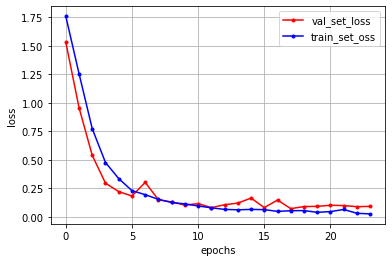

In [27]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [28]:
#img 하나만 실행

In [29]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

test_img='./KWGuideImg/dataset/test/test_img3.jpg'

img = Image.open(test_img)
img = img.convert("RGB")
img = img.resize((image_w, image_h)) #사이즈 재조정
data = np.asarray(img)

X=np.array(data)

X = X.astype("float") / 256
X = X.reshape(-1, 64, 64,3)

In [30]:
pred = model.predict(X)  
result = [np.argmax(value) for value in pred]   # 예측 값중 가장 높은 클래스 반환
print('New data category : ',categories[result[0]]) #카테고리중 해당되는 것 반환 => 바꾸기

New data category :  hwan


In [ ]:
#=============================================

In [ ]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

base_dir = ':C/KWGuideImg/dataset/test' #test img 넣기

In [33]:
image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
filenames = []
files = glob.glob(base_dir+"/*.*")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)  #목록이 예상크기로 조정됨 근듸 왜때문에 input이 안맞는거죠
    X.append(data)

X = np.array(X)

X #왜 아무것도 없을꽈??


[]
[]


In [ ]:
model = load_model('./model/multi_img_classification.model')

prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0

#prediction = model.predict(test_generator)
#np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

for i in prediction:
    pre_ans = i.argmax()  # 예측 레이블
    print(i)
    print(pre_ans)
    pre_ans_str = ''
    if pre_ans == 0: pre_ans_str = "기념관"
    elif pre_ans == 1: pre_ans_str = "화도관"
    elif pre_ans == 2: pre_ans_str = "옥의관"
    elif pre_ans == 3: pre_ans_str = "비마관"
    elif pre_ans == 4: pre_ans_str = "새빛관"
    elif pre_ans == 5: pre_ans_str = "참빛관"
    elif pre_ans == 6: pre_ans_str ="한울관"
    elif pre_ans == 7: pre_ans_str ="복지관"
    elif pre_ans == 8: pre_ans_str ="한천재"
    else: pre_ans_str = "연구관"
    
    if i[0] >= 0.8 : print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[1] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[2] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[3] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[4] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[5] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[6] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[7] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[8] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[9] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")    
   
    cnt += 1
    # print(i.argmax()) #얘가 레이블 [1. 0. 0.] 이런식으로 되어 있는 것을 숫자로 바꿔주는 것.
    # 즉 얘랑, 나중에 카테고리 데이터 불러와서 카테고리랑 비교를 해서 같으면 맞는거고, 아니면 틀린거로 취급하면 된다.
    # 이걸 한 것은 _4.py에.